In [1]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
import RFmod as RF
from numpy import pi as pi


#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
# get values for some physical parameters
b = SL.b
g = SL.g
G = SL.G
rhoi = SL.rhoi
rhow = SL.rhow
rhos = SL.rhos

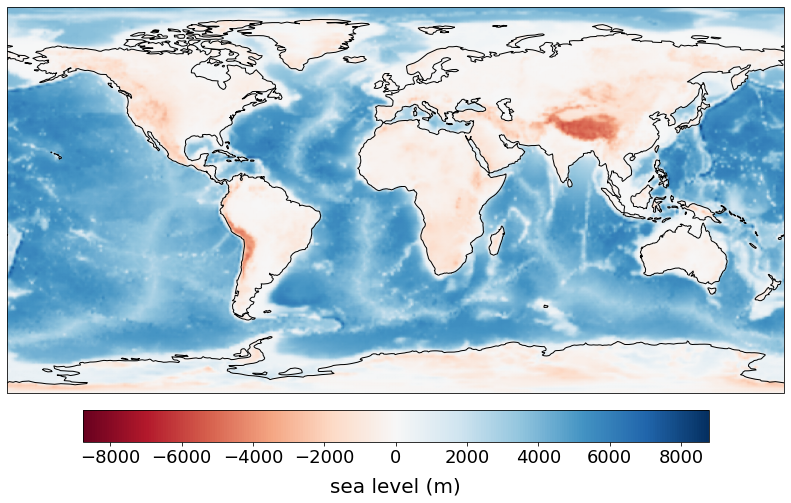

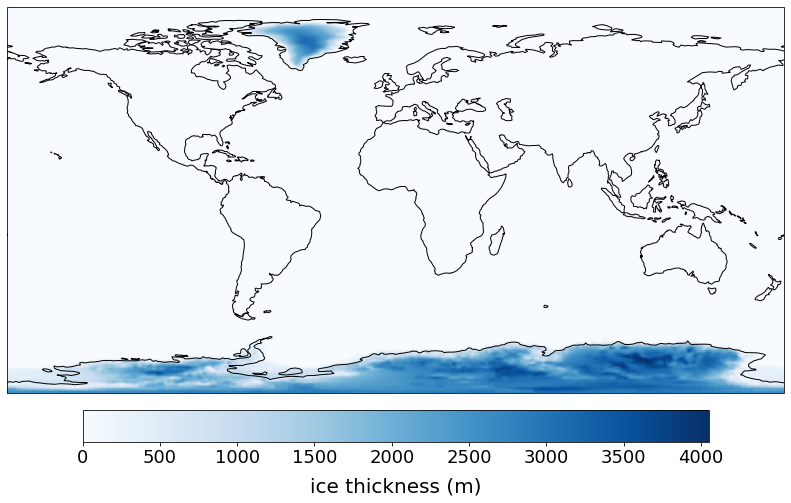

In [3]:
# set the truncation degree
L=256

# read in the present day sea level and ice thickness
sl0,ice0 = SL.get_sl_ice_data(L)

# plot these fields
SL.plot(sl0,label = 'sea level (m)')
SL.plot(ice0,label = 'ice thickness (m)',clim_pos = True)

# compute the ocean function
C = SL.ocean_function(sl0,ice0)

# get the ocean mask
ocean_mask = SL.ocean_mask(sl0,ice0)

# get the ice mask
ice_mask = SL.ice_mask(sl0,ice0)

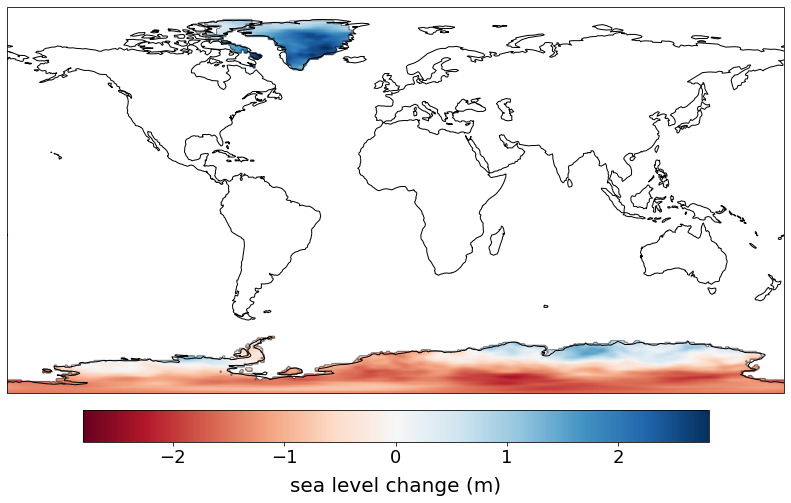

iteration =  1 relative change =  0.03139969062848463
iteration =  2 relative change =  0.004102172250114805
iteration =  3 relative change =  0.0007536058742528477
iteration =  4 relative change =  0.00016239347557475372
iteration =  5 relative change =  3.742157839446939e-05
iteration =  6 relative change =  9.142950957043329e-06
iteration =  7 relative change =  2.364004581526813e-06
iteration =  8 relative change =  6.444847515782146e-07
iteration =  9 relative change =  1.839239605224035e-07
iteration =  10 relative change =  5.446352933445419e-08
iteration =  11 relative change =  1.65864260810839e-08
iteration =  12 relative change =  5.1538981342225745e-09


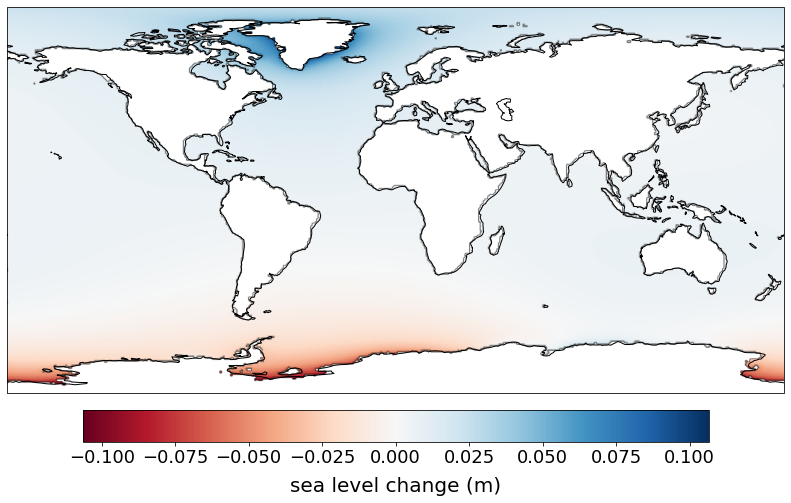

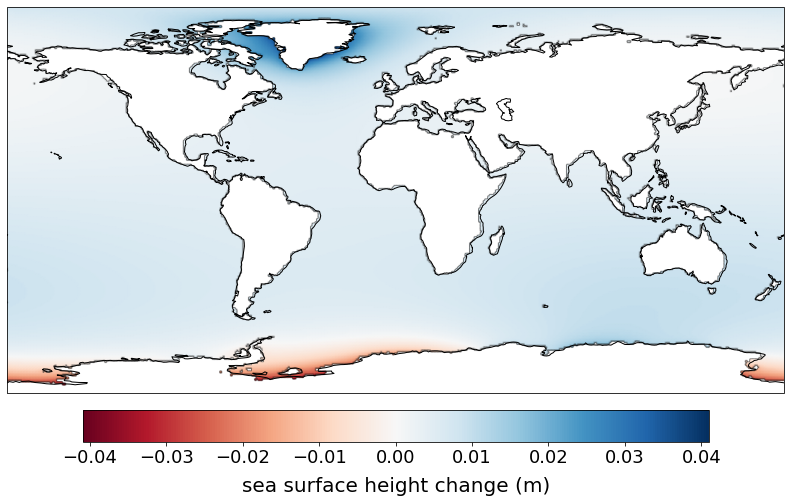

In [4]:
# Set the covariance for the random field
Q = RF.sobolev_covariance(L,s = 2,mu = 0.2, b = b)

# Generate the random ice model
zeta = -rhoi*SL.random_ice_model(sl0,ice0,Q,b = b)

# Scale the load to a given value of \Delta GMSL
GMSL = 0.005
zeta = GMSL * zeta / SL.bathtub(C,zeta)

# plot the change in ice thickness
SL.plot(ice_mask*zeta / rhoi,label = r'sea level change (m)')

# Solve the sea level equation
sl,u,phi,om,psi = SL.fingerprint(C,zeta)

# plot the result
SL.plot(ocean_mask*sl,label = r'sea level change (m)')

# Compute and plot the sea surface height change
ssh = sl + u + psi/SL.g
SL.plot(ocean_mask*ssh,label = r'sea surface height change (m)')
